In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import jieba
import jieba.analyse

[[1 1 0 1 0 1 1]
 [0 0 1 1 1 1 0]]


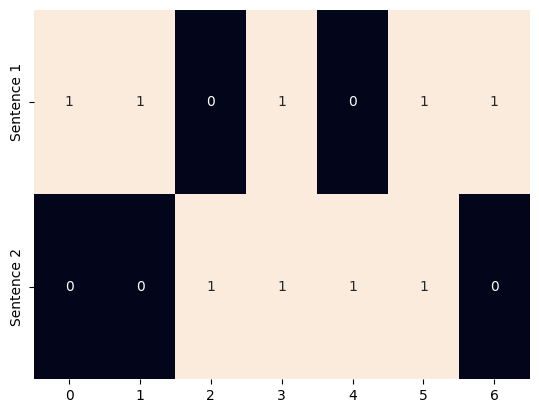

In [2]:
# 英文展示
corpus = ["Time flies flies like an arrow.", "Fruit flies like a banana."]

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()

sns.heatmap(one_hot, annot=True, cbar=False, yticklabels=["Sentence 1", "Sentence 2"])
print(one_hot)
plt.show()

In [3]:
# 中文展示
# 取得停用詞列表
def get_stopwords_list(stopwordfile):
    stopwords = [
        line.strip() for line in open(stopwordfile, encoding="UTF-8").readlines()
    ]
    return stopwords


# 移除停用詞
def movestopwords(sentence):
    stopwords = get_stopwords_list("./stopwords.txt")  # 載入停用詞檔
    santi_words = [x for x in sentence if len(x) > 1 and x not in stopwords]
    return santi_words

In [5]:
# 語料
corpus = [
    "小明碩士畢業於台北淡江大學，後在日本京都大學深造。",
    "小王畢業於清華大學，後來在台北工作，後在日本早稻田大學深造",
    "小李畢業於清華大學，碩士畢業於中央大學計算所，博士也在中央大學",
]

newcorpus = []

for str in corpus:
    orgwordlist = jieba.lcut(str)  # jieba分詞
    wordlist = movestopwords(orgwordlist)  # 移除停用詞
    newword = " ".join(wordlist)  # 依照語料庫要求進行空格分隔
    newcorpus.append(newword)  # 依照語料庫要求轉換成列表
newcorpus

['小明 碩士 畢業 台北 淡江 大學 日本 京都 大學 深造',
 '小王 畢業 清華大學 台北 工作 日本 早稻田 大學 深造',
 '小李 畢業 清華大學 碩士 畢業 中央 大學 計算 博士 中央 大學']

In [6]:
# 建立詞袋資料結構
one_hot_vectorizer = CountVectorizer(binary=True)

# 轉換語料，並矩陣化
one_hot = one_hot_vectorizer.fit_transform(newcorpus).toarray()

# 輸出熱詞
one_hot_vectorizer.vocabulary_


{'小明': 5,
 '碩士': 15,
 '畢業': 14,
 '台北': 3,
 '淡江': 11,
 '大學': 4,
 '日本': 9,
 '京都': 1,
 '深造': 12,
 '小王': 7,
 '清華大學': 13,
 '工作': 8,
 '早稻田': 10,
 '小李': 6,
 '中央': 0,
 '計算': 16,
 '博士': 2}

In [7]:
import pandas as pd

df = pd.DataFrame(data=one_hot, columns=one_hot_vectorizer.get_feature_names_out())
# 舊版：one_hot_vectorizer.get_feature_names()
df

,中央,京都,博士,台北,大學,小明,小李,小王,工作,日本,早稻田,淡江,深造,清華大學,畢業,碩士,計算
0,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0
1,0,0,0,1,1,0,0,1,1,1,1,0,1,1,1,0,0
2,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,1


In [8]:
one_hot_vectorizer.get_feature_names_out()


array(['中央', '京都', '博士', '台北', '大學', '小明', '小李', '小王', '工作', '日本', '早稻田',
       '淡江', '深造', '清華大學', '畢業', '碩士', '計算'], dtype=object)

/home/chesterxalan/github/Classwork/Classwork-PythonDLApplicationDevelopment/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/chesterxalan/github/Classwork/Classwork-PythonDLApplicationDevelopment/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22830 (\N{CJK UNIFIED IDEOGRAPH-592E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/chesterxalan/github/Classwork/Classwork-PythonDLApplicationDevelopment/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/chesterxalan/github/Classwork/Classwork-PythonDLApplicationDevelopment/.venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/chesterxalan/g

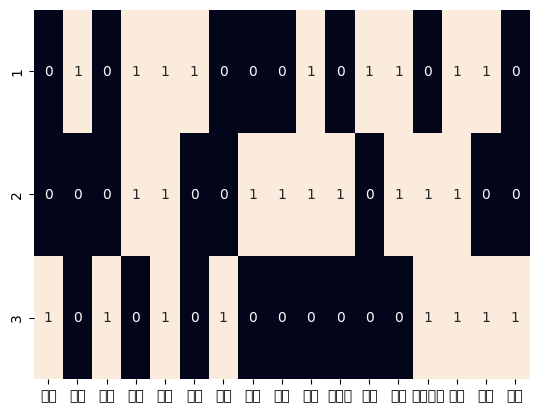

In [9]:
# one_hot 圖
sns.heatmap(
    one_hot,
    annot=True,
    cbar=False,
    xticklabels=one_hot_vectorizer.get_feature_names_out(),
    yticklabels=["1", "2", "3"],
)
plt.show()